Минимизируемая функция:

$$f(x,y) = 2x^2-1.05x^4+x^6/6+xy+y^2$$ при фиксированном $y=1$

$$f(x) = 2x^2-1.05x^4+x^6/6+x+1$$

Отрезок для поиска минимума: $[-2, 2]$

Точность $eps =0.001$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [46]:
def formula_to_function(formula):
    x = sp.symbols('x')
    func = sp.sympify(formula)
    return sp.lambdify((x), func, 'numpy')

In [47]:
def find_nearest_points(points_x, target):
    nearest_left = -np.inf
    nearest_right = np.inf
    for x_coord in points_x:
        if x_coord < target and x_coord > nearest_left:
            nearest_left = x_coord
        elif x_coord > target and x_coord < nearest_right:
            nearest_right = x_coord
    return nearest_left, nearest_right

In [59]:
def minimize_function(formula, bounds, eps):
    func = formula_to_function(formula)
    a, b = bounds[0], bounds[1]

    x = np.linspace(a, b, 500)
    f = [func(X) for X in x]
    L = 2 * max([abs(f[i+1]-f[i]) / (x[i+1]-x[i]) for i in range(len(x)-1)])

    points = {}
    x_points = [a,b]
    best_point_x = np.inf
    best_point_y = np.inf

    # итерация A
    g0_point_left = (a, func(a))
    g0_point_right = (b, func(a)-L*(b-(a)))
    # итерация B
    g1_point_left = (b, func(b))
    g1_point_right = (a, func(b)+L*(a-b))
    # пересечение
    x_inter = (func(a) - func(b))/2/L + (a+b)/2
    y_inter = func(x_inter)
    mid = (x_inter, y_inter)

    x_points.append(mid[0])
    mid_polch_l = (a, y_inter+L*(a-x_inter))
    mid_polch_r = (b, y_inter-L*(b-(x_inter)))
    points[mid[0]] =  abs(func(a)-L*(mid[0]-(a)) - func(mid[0]))
    del points[mid[0]]

    plt.figure(figsize=(10,5))
    plt.grid(linewidth=0.3)
    plt.plot(x, f)
    plt.plot((g0_point_left[0], g0_point_right[0]), (g0_point_left[1], g0_point_right[1]), '-', c='g', linewidth=0.5)
    plt.plot((g1_point_left[0], g1_point_right[0]), (g1_point_left[1], g1_point_right[1]), '-', c='g', linewidth=0.5)
    plt.plot(x_inter, y_inter, '.', c='r')
    plt.plot((mid_polch_l[0], mid[0]), (mid_polch_l[1], mid[1]), '-', c='g', linewidth=0.5)
    plt.plot((mid_polch_r[0], mid[0]), (mid_polch_r[1], mid[1]), '-', c='g', linewidth=0.5)

    left = a
    right = b
    m = mid[0]
    diff = max(f)

    while abs(diff) > eps:

        # левое пересечение
        x_inter_l = (func(left) - func(m))/2/L + (left+m)/2
        y_inter_l = func(x_inter_l)
        mid1 = (x_inter_l, y_inter_l)
        x_points.append(mid1[0])
        #разница между точкой пересечения ломаных и функцией для критерия остановы
        dif1 = abs(func(left)-L*(x_inter_l-(left)) - func(x_inter_l))
        points[mid1[0]] = func(left)-L*(x_inter_l-(left))

        # правое пересечение
        x_inter_r = (func(m) - func(right))/2/L + (m+right)/2
        y_inter_r = func(x_inter_r)
        mid2 = (x_inter_r, y_inter_r)
        x_points.append(mid2[0])
        #разница между точкой пересечения ломаных и функцией для критерия остановы
        dif2 = abs(func(m)-L*(x_inter_r-(m)) - func(x_inter_r))
        points[mid2[0]] = func(m)-L*(x_inter_r-(m))

        # находим нижнюю из точек
        new_mid = (min(points, key=points.get), func(min(points, key=points.get)))
        del points[new_mid[0]]
        m = new_mid[0]

        # находим ближайшие точки по х
        left, right = find_nearest_points(x_points, new_mid[0])

        # рисуем ломаные
        mid_polch_l = (a, func(new_mid[0])+L*(a-new_mid[0]))
        mid_polch_r =(b, func(m)-L*(b-(m)))

        plt.plot(x_inter_l, y_inter_l, '.', c='r')
        plt.plot(x_inter_r, y_inter_r, '.', c='r')
        plt.plot((mid_polch_l[0], new_mid[0]), (mid_polch_l[1], new_mid[1]), '-', c='g', linewidth=0.5)
        plt.plot((mid_polch_r[0], new_mid[0]), (mid_polch_r[1], new_mid[1]), '-', c='g', linewidth=0.5)

        # находи разницу
        diff = min([dif1, dif2])
        # проверяем минимум
        if func(m) < best_point_y:
            best_point_y = func(m)
            best_point_x = m


    plt.plot(best_point_x, best_point_y, '*', c='y')
    plt.ylim(0,5)

    return best_point_x, best_point_y

Минимум функции: x = -1.757681, y = 0.313927


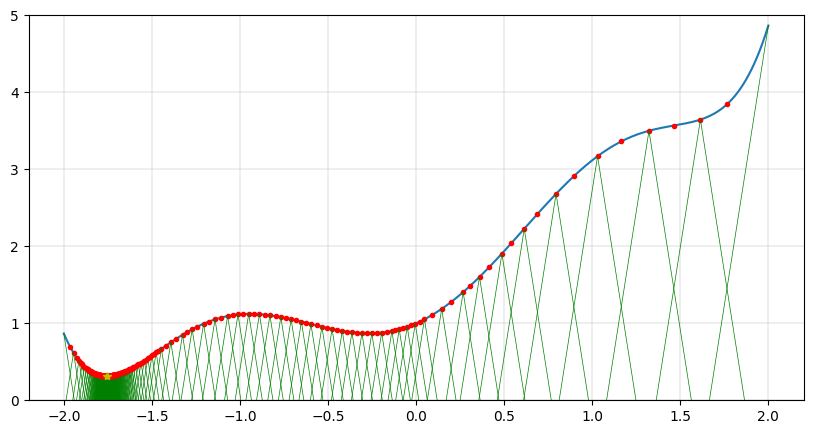

In [60]:
formula = '2*x**2 - 1.05*x**4 + x**6/6 +x*1 + 1**2'
bounds = [-2, 2]
eps = 0.001

x_min, y_min  = minimize_function(formula, bounds, eps)
print(f'Минимум функции: x = {round(x_min, 6)}, y = {round(y_min, 6)}')

\begin{array}{|c|c|} \hline
Реализация & Время, c & x & y \\ \hline
Python & 1 & -1.757681 & 0.313927 \\
Excel & 47 & -1.761211 & 0.313956 \\
\hline
\end{array}

